# Example of an analysis 

First read some libraries needed. 


In [1]:
import numpy as np
import scipy as sp
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

### Defining the right hand side function
This can be changed, or another can be defined later on. The example uses:

In [2]:
# This is a function that evaluates the right hand side of the 2D ODE, changing the parameters change the system. 

def rhs_2D(t=0, pos=[0,0], params=[-1,0,1,0]):
    x, y = pos
    a,b,c,d=params
    dxdt = a*x + b*y
    dydt = c*x+ d*y
    return [dxdt, dydt]

In [3]:
# Evaluate the right hand side by changing pos and params. Try a few different values of pos and params.
rhs_2D(t=0, pos=[0,0], params=[-1,0,1,0])

[0, 0]

## Some functions


In [4]:

def plot_flow(ax,rhs,xrange=[-2,2],yrange=[-2,2],xnum=100,ynum=100,params=None,nullclines=False):
    # Set up u,v space
    u = np.linspace(xrange[0], xrange[1], xnum)
    v = np.linspace(yrange[0], yrange[1], ynum)
    uu, vv = np.meshgrid(u, v)

# Compute derivatives
    u_vel = np.empty_like(uu)
    v_vel = np.empty_like(vv)
    for i in range(uu.shape[0]):
        for j in range(uu.shape[1]):
            u_vel[i,j], v_vel[i,j] = rhs(t=0,pos=np.array([uu[i,j], vv[i,j]]),params=params)

# Compute speed
    speed = np.sqrt(u_vel**2 + v_vel**2)

    # Make linewidths proportional to speed,
    # with minimal line width of 0.5 and max of 3
    lw = 0.5 + 2.5 * speed / speed.max()

# Make stream plot
    ax.streamplot(uu, vv, u_vel, v_vel, linewidth=lw,color='grey')
#Nullclines
    if nullclines: 
        ax.contour(uu, vv, u_vel, [0],colors=('r'))
        ax.contour(uu, vv, v_vel, [0],colors=('b'))

    return ax

# A function that plots a path 
def plot_solution(ax,rhs,y0,t_end,t_dim=2000,params=None,color='green',init_pt=True,linewidth=2.5):

    t = np.linspace(0, t_end, t_dim)
    X = sp.integrate.solve_ivp(rhs,t_span=[t[0],t[-1]],y0=y0,t_eval=t,args=(params,))
    x,y=X.y
    t=X.t
    ax.plot(x,y, color=color,linewidth=linewidth)
    if (init_pt):
        ax=plot_point(ax,y0,color=color)
    return ax

#A function to add fixed points to a phase diagram 
def plot_point(ax, coord, color='black',markersize=20):
    """Add fixed points to plot."""
    x,y=coord
    ax.plot(x,y, '.', color='black', markerfacecolor=color, markersize=markersize)
    return ax



# An example


<Axes: xlabel='X', ylabel='Y'>

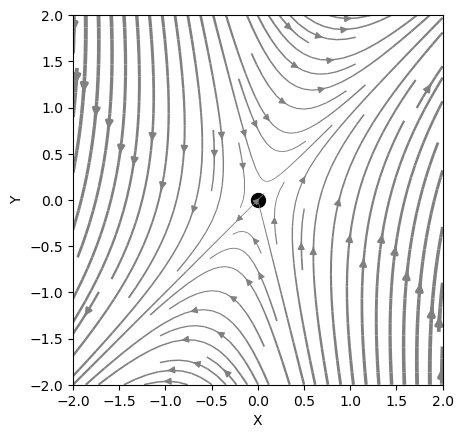

In [5]:

params = [1,1,4,-2]
fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Plot the fixed points
plot_point(ax, [0,0])

# Plot the flow, change the nulclines to True to plot the nullclines
plot_flow(ax, rhs_2D, xrange=[-2, 2], yrange=[-2, 2], params=params,xnum=100, ynum=100, nullclines=False)




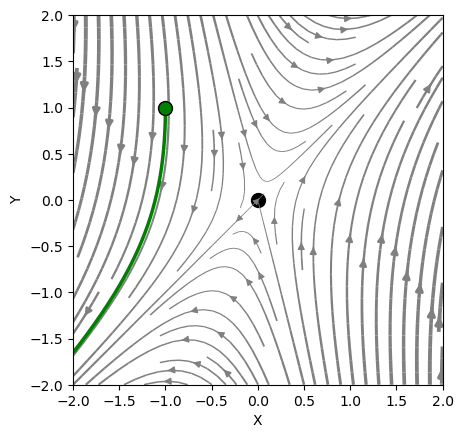

In [6]:

# Plot solutions
y0=[-1,1]
plot_solution(ax, rhs_2D, y0, t_end=10, t_dim=2000,params=params, color='green', init_pt=True, linewidth=2.5)
#y0=[0.1,0.1]
#plot_solution(ax, rhs_2D, y0, t_end=10, t_dim=2000,params=params, color='yellow', init_pt=True, linewidth=2.5)
#y0=[0.01,0.04]
#plot_solution(ax, rhs_2D, y0, t_end=-10, t_dim=2000,params=params, color='yellow', init_pt=True, linewidth=2.5)

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()
fig


# The eigenvalue problem
Finding the eigenvalues and eigenvectors

Using numpys eig function: https://numpy.org/doc/2.1/reference/generated/numpy.linalg.eig.html

In [7]:




# Define the matrix A from the parameters
A = np.array([[params[0], params[1]], [params[2], params[3]]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

pprint("A:")
pprint(A)
print()

for i in range(len(eigenvalues)):
    print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    print(f"Eigenvector {i+1}: {eigenvectors[:, i]}")
    print()

'A:'
array([[ 1,  1],
       [ 4, -2]])

Eigenvalue 1: 2.0
Eigenvector 1: [0.70710678 0.70710678]

Eigenvalue 2: -3.0
Eigenvector 2: [-0.24253563  0.9701425 ]



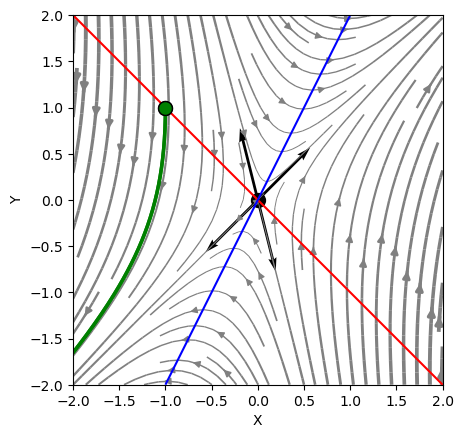

In [77]:
# Let's plot the eigenvectors
origin = np.array([[0, 0], [0, 0]])  # origin point

# Plot eigenvectors
ax.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['k', 'k'], scale=5)
ax.quiver(*origin, -eigenvectors[0, :], -eigenvectors[1, :], color=['k', 'k'], scale=5)
plt.show()
fig

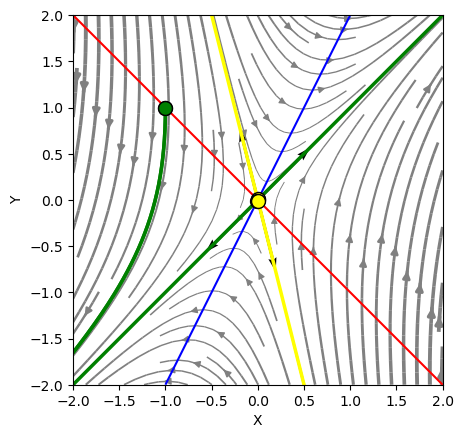

In [78]:
# Plot solutions starting very close to the origin along the eigenvectors
for scale in [0.01, -0.01]:
    y0 = scale * eigenvectors[:, 0]
    plot_solution(ax, rhs_2D, y0, t_end=10, t_dim=2000, params=params, color='grey', init_pt=True, linewidth=2.5)
    y0 = scale * eigenvectors[:, 1]
    plot_solution(ax, rhs_2D, y0, t_end=-10, t_dim=2000, params=params, color='grey', init_pt=True, linewidth=2.5)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()
fig


# All at once
All in one cell


Eigenvalue 1: -2.0
Eigenvector 1: [1. 0.]

Eigenvalue 2: -1.0
Eigenvector 2: [0. 1.]

The system has real eigenvalues. Plotting the eigenvectors.


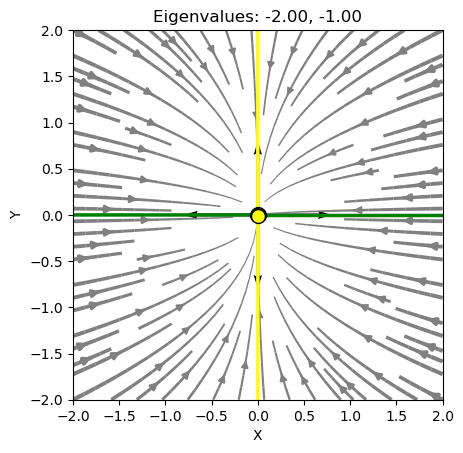

In [ ]:
# Change this one to see the effect of the parameters on the system
params = [1,1,4,-2]


fig, ax = plt.subplots(1, 1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')

# Plot the fixed points
plot_point(ax, [0,0])

# Plot the flow, change the nulclines to True to plot the nullclines
plot_flow(ax, rhs_2D, xrange=[-2, 2], yrange=[-2, 2], params=params,xnum=100, ynum=100, nullclines=True)

# The eigenvalues and eigenvectors
# Define the matrix A from the parameters
A = np.array([[params[0], params[1]], [params[2], params[3]]])

# Calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

print()

for i in range(len(eigenvalues)):
    print(f"Eigenvalue {i+1}: {eigenvalues[i]}")
    print(f"Eigenvector {i+1}: {eigenvectors[:, i]}")
    print()

    # Check if the eigenvalues are complex
if np.iscomplex(eigenvalues).any():
    print("The system has complex eigenvalues.")
else:
    print("The system has real eigenvalues. Plotting the eigenvectors.")
# Let's plot the eigenvectors
    origin = np.array([[0, 0], [0, 0]])  # origin point

# Plot eigenvectors
    ax.quiver(*origin, eigenvectors[0, :], eigenvectors[1, :], color=['k', 'k'], scale=5)
    ax.quiver(*origin, -eigenvectors[0, :], -eigenvectors[1, :], color=['k', 'k'], scale=5)

for scale in [0.01, -0.01]:
    y0 = scale * eigenvectors[:, 0]
    sign=np.sign(eigenvalues[0])
    plot_solution(ax, rhs_2D, y0, t_end=sign*10, t_dim=2000, params=params, color='grey', init_pt=True, linewidth=2.5)
    y0 = scale * eigenvectors[:, 1]
    sign=np.sign(eigenvalues[1])
    plot_solution(ax, rhs_2D, y0, t_end=sign*10, t_dim=2000, params=params, color='grey', init_pt=True, linewidth=2.5)
ax.set_title(f"Eigenvalues: {eigenvalues[0]:.2f}, {eigenvalues[1]:.2f}")
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
plt.show()



# Exercises
1. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    a & 0 \\
    0 & -1
    \end{array} 
\right)
$$
and $a$ varies from $- \infty$ to $\infty$.

2. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    0 & 1 \\
    1 & 0
    \end{array} 
\right)
$$
3. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    0 & 1 \\
    -1 & 0
    \end{array} 
\right)
$$
4. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    2 & 1 \\
    3 & 4
    \end{array} 
\right)
$$
5. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    -1 & 0 \\
    0 & -2
    \end{array} 
\right)
$$
6. Analyse the linear system when 
$$
A= \left(
    \begin{array}{cc}
    -1 & -2 \\
    2 & -2
    \end{array} 
\right)
$$